Start of this project: June 13th, 2022<br>
Done by: Juan Pablo Varela<br>
Institution: University of Massachussetts Boston (Graduate Student - Physics Department)

Visualization and analysis of new COVID-19 cases throughout the different towns and counties in Massachusetts. Dataset includes daily and weekly new positive infections and cumulative sums since the start of the pandemic for each of the 14 Massachusetts counties. Visualization is also done for COVID-18 case count data taken for all 50 states, as well as cases by age group and vaccinatio status. 

Data was collected from August 19th,2020 to June 17th, 2022 for the daily dataset, and December 6th, 2020 to June 11th, 2022 for the weekly dataset. Taken from the Archive of COVID-19 cases in Massachusetts in the Mass.gov website. Original data was extracted by the Massachusetts Department of Public Health (DPH).<br>
Link to download data for MA: https://www.mass.gov/info-details/archive-of-covid-19-cases-in-massachusetts<br>

Nationwide data is extracted from the CDC data repository, which was taken from January 22nd, 2020 to June 16th, 2022.<br>
Nationwide daily data: https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36<br>
Cases per Age Group and Vaccination Status: https://data.cdc.gov/Public-Health-Surveillance/Rates-of-COVID-19-Cases-or-Deaths-by-Age-Group-and/3rge-nu2a<br>

Nationwide COVID-19 data:


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
7375,2020-01-22,ID,0,NaN,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,2020-03-26T16:22:39.452,Agree,Agree
1105,2020-01-22,VI,0,NaN,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,2020-03-26T16:22:39.452,NaN,NaN
29823,2020-01-22,MA,0,NaN,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,2020-03-26T16:22:39.452,Agree,Agree
10910,2020-01-22,RI,0,NaN,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,2020-03-26T16:22:39.452,Not agree,N/A
4256,2020-01-22,AL,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2020-01-22T00:00:00.000,Agree,Agree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9846,2022-06-23,IN,1762056,NaN,NaN,0.0,0.0,23841,22868.0,973.0,0.0,0.0,2022-06-24T13:41:53.120,Not agree,Agree
42735,2022-06-23,MD,1126088,NaN,NaN,1698.0,0.0,14760,14493.0,267.0,4.0,0.0,2022-06-24T13:41:53.120,N/A,Agree
52847,2022-06-23,KY,1395370,951674.0,443696.0,2902.0,834.0,16127,13901.0,2226.0,4.0,2.0,2022-06-24T13:41:53.120,Agree,Agree
18430,2022-06-23,HI,296007,NaN,NaN,0.0,0.0,1477,NaN,NaN,0.0,0.0,2022-06-24T13:41:53.120,Not agree,Not agree


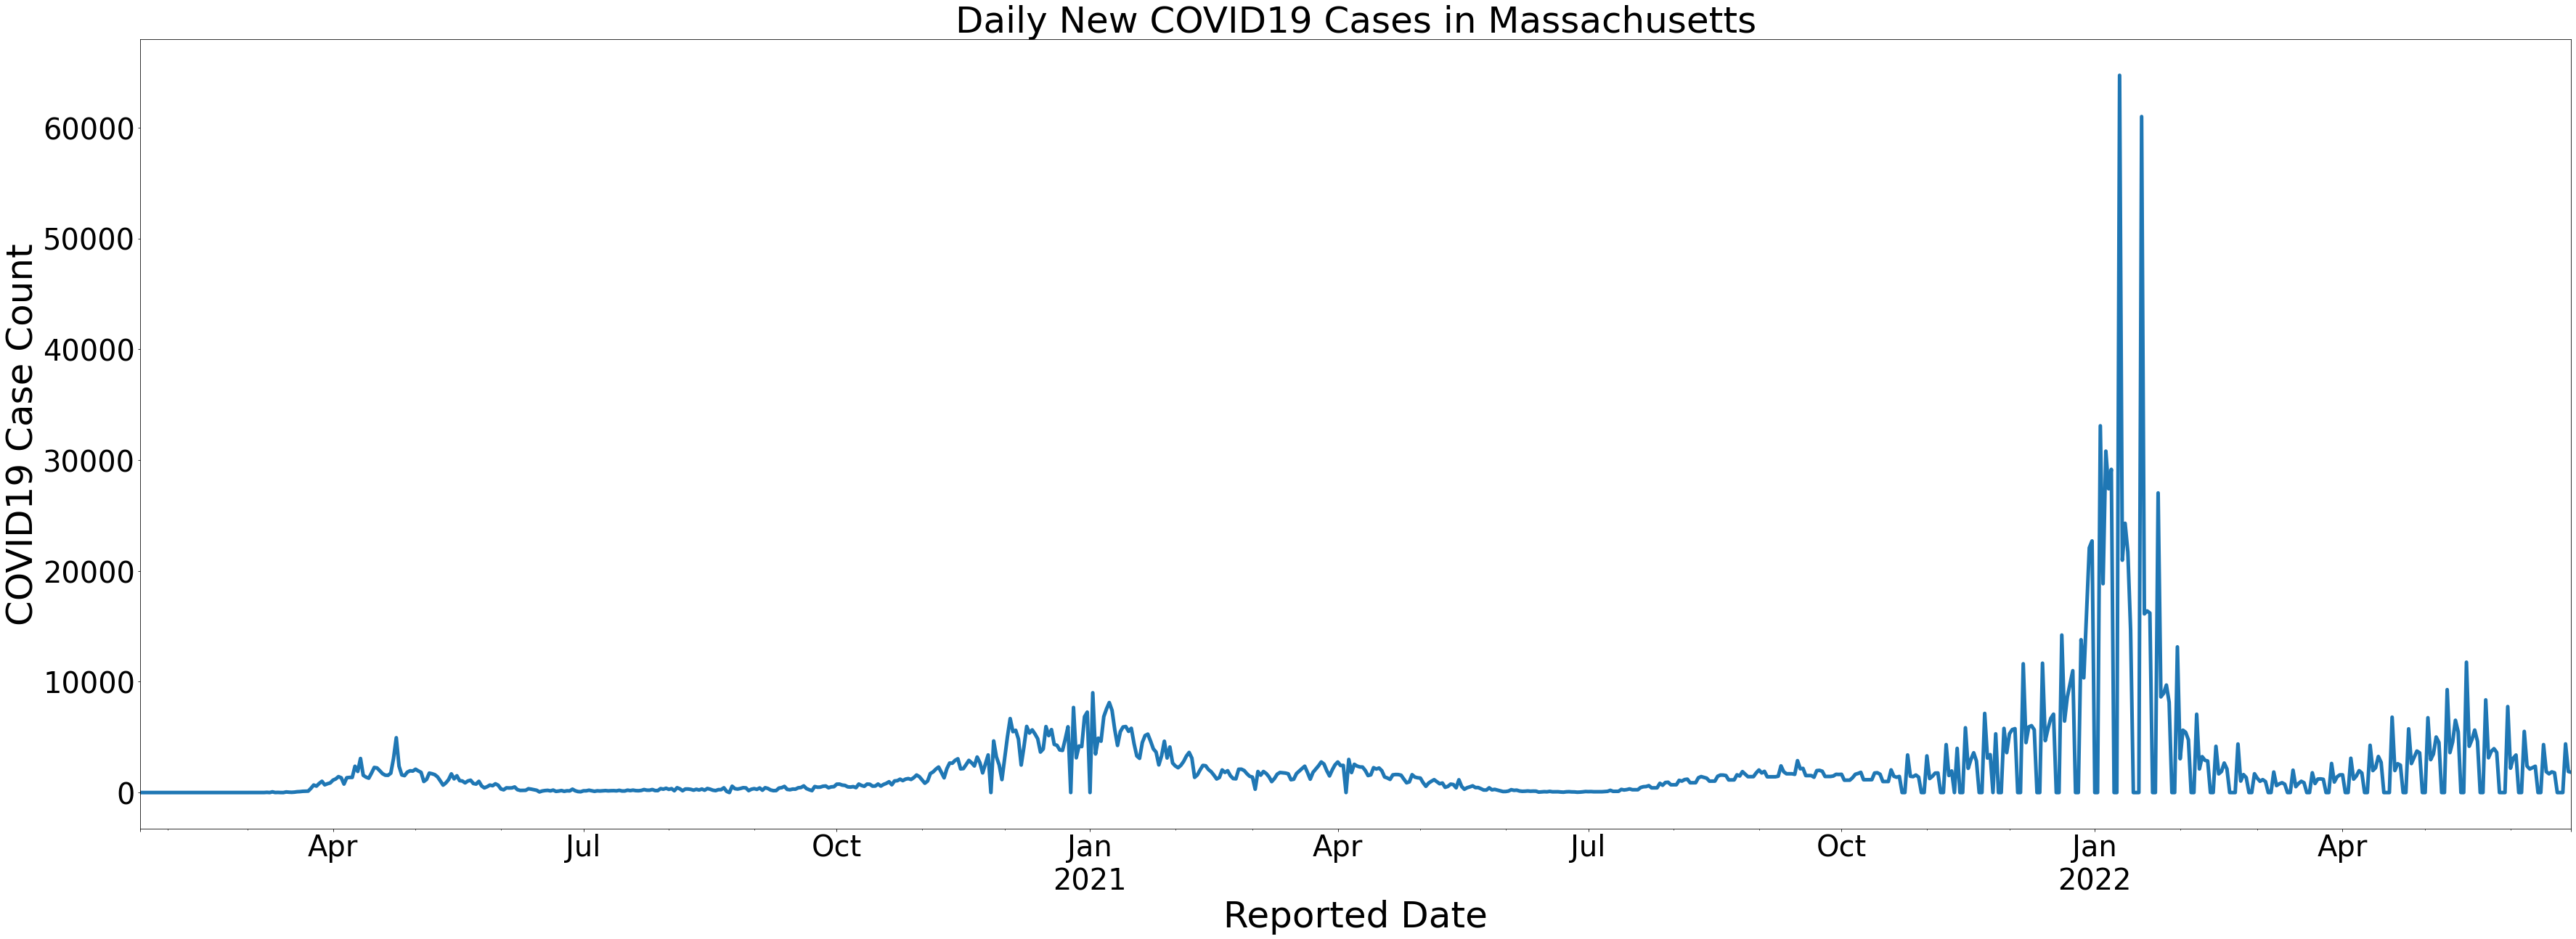

In [1]:
# Import needed modules, functions and objects
import pandas as pd
from pandas import read_csv, read_excel, ExcelFile 
from matplotlib import pyplot
from sodapy import Socrata

# Web scrap CDC data on US COVID-19 Cases and Deaths by State using sodapy/Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", None)

# Return client as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("9mfq-cb36", limit=56000,offset=100)

# Convert to pandas DataFrame & format needed columns correctly
nationwide = pd.DataFrame.from_records(results)
nationwide = nationwide.sort_values(by='submission_date') # sort instances by data submission date
nationwide[['tot_cases','conf_cases','prob_cases','new_case','pnew_case','tot_death','conf_death',
                     'prob_death','new_death','pnew_death']] = nationwide[['tot_cases','conf_cases','prob_cases',
                    'new_case','pnew_case','tot_death','conf_death','prob_death','new_death','pnew_death']].apply(pd.to_numeric)
nationwide['submission_date'] = pd.to_datetime(nationwide['submission_date'])
print('Nationwide COVID-19 data:')
display(nationwide)
print('')

# Select date specific for Massachusetts
nationwide_MA = nationwide.loc[nationwide["state"].isin(['MA'])]

# Visualize daily new cases 
ax =nationwide_MA.plot(x='submission_date',y='new_case',kind='line',figsize=(60,20),fontsize=40,
                                 title='Daily New COVID19 Cases in Massachusetts',linewidth=5)

ax.title.set_size(50)
ax.get_legend().remove()
pyplot.xlabel('Reported Date',fontsize = 50)
pyplot.ylabel('COVID19 Case Count',fontsize = 50)
pyplot.savefig('COVID19_MA_newcases.jpg')

In [2]:
# Web scrap CDC data on US COVID-19 Cases and Deaths by State using sodapy/Socrata

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("data.cdc.gov", None)

# Return client as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("3rge-nu2a", limit=5000,offset=100)

age_vaccine_soda = pd.DataFrame.from_records(results)
age_vaccine_soda

,outcome,month,mmwr_week,age_group,vaccine_product,vaccinated_with_outcome,fully_vaccinated_population,unvaccinated_with_outcome,unvaccinated_population,crude_vax_ir,crude_unvax_ir,crude_irr,continuity_correction,age_adj_vax_ir,age_adj_unvax_ir,age_adj_irr
0,case,JUN 2021,202124,12-17,all_types,48,1739960,4040,12363033,2.758684108,32.67806533,11.84552636,0,NaN,NaN,NaN
1,case,JUN 2021,202124,18-29,all_types,714,12785206,11617,21118269,5.584579552,55.00924342,9.850203207,0,NaN,NaN,NaN
2,case,JUN 2021,202124,30-49,all_types,1705,26751163,16082,25808366,6.373554675,62.31312746,9.776824807,0,NaN,NaN,NaN
3,case,JUN 2021,202124,50-64,all_types,1424,25480744,7592,13478231,5.588533836,56.32786677,10.07918506,0,NaN,NaN,NaN
4,case,JUN 2021,202124,65-79,all_types,1136,21261444,2785,4596760.6,5.343004925,60.58614408,11.33933899,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,death,APR 2022,202217,80+,all_types,139,6884575,82,1034612.95,2.019006257,7.925669208,3.92552979,1,NaN,NaN,NaN
1091,death,APR 2022,202217,all_ages_adj,Janssen,9,10445424,173,49876932.95,0.086162132,0.346853725,4.025593585,0,0.09789579,0.653874355,6.679289821
1092,death,APR 2022,202217,all_ages_adj,Moderna,100,47816469,173,49876932.95,0.209132966,0.346853725,1.65853204,0,0.108445894,0.653874355,6.029498502
1093,death,APR 2022,202217,all_ages_adj,Pfizer,150,79878524,173,52396909.95,0.187785142,0.330172142,1.758244225,0,0.154873953,0.653861022,4.221891482


In [3]:
# Loading in data (daily and weekly)
ma_excel = ExcelFile('covid-19-raw-data-6-17-2022.xlsx')
daily = read_excel(ma_excel,'County_Daily')
weekly = read_excel(ma_excel,'County_Weekly')
weekly_state = read_excel(ma_excel,'Weekly_Statewide')
male_vs_female = read_excel(ma_excel,'SexLast2Weeks')

age_vaccine_groups = read_csv('Rates_of_COVID-19_Cases_or_Deaths_by_Age_Group_and_Vaccination_Status.csv')

In [4]:
# Peeking at data
print('Daily MA Counties COVID-19 Cases:')
display(daily.head(20))
display(daily.describe())

Daily MA Counties COVID-19 Cases:


,Date,County,New Confirmed Cases,Total Confirmed Cases,New Probable and Confirmed Deaths,Total Probable and Confirmed Deaths
0,2020-08-19,Barnstable,0.0,1579.0,2.0,164.0
1,2020-08-19,Berkshire,1.0,632.0,0.0,46.0
2,2020-08-19,Bristol,12.0,8864.0,0.0,644.0
3,2020-08-19,Dukes,0.0,50.0,NaN,NaN
4,2020-08-19,Essex,56.0,17435.0,1.0,1205.0
5,2020-08-19,Franklin,0.0,375.0,0.0,61.0
6,2020-08-19,Hampden,12.0,7482.0,3.0,729.0
7,2020-08-19,Hampshire,9.0,1107.0,0.0,131.0
8,2020-08-19,Middlesex,42.0,24538.0,10.0,2034.0
9,2020-08-19,Nantucket,0.0,34.0,NaN,NaN


,New Confirmed Cases,Total Confirmed Cases,New Probable and Confirmed Deaths,Total Probable and Confirmed Deaths
count,8293.00000,8295.000000,7739.000000,7747.000000
mean,197.03509,48898.238457,2.036956,1174.323093
std,501.86820,63193.478993,3.267070,1062.378579
min,-322.00000,34.000000,-4.000000,0.000000
25%,8.00000,2585.500000,0.000000,170.000000
50%,56.00000,21280.000000,1.000000,1107.000000
75%,200.00000,74887.000000,3.000000,1862.500000
max,13761.00000,375171.000000,43.000000,4726.000000


In [5]:
print('Weekly MA Counties COVID-19 Cases:')
display(weekly.head(20))
display(weekly.describe())

Weekly MA Counties COVID-19 Cases:


,Report Date,Start Date,End Date,County,Total Case Count,Case Count (Last 14 Days),"Average Daily Incidence Rate per 100,000 (Last 14 days)",Relative Change in Case Counts,Total Tests,Total Tests (Last 14 days),Total Positive Tests (Last 14 days),Percent Positivity (Last 14 days),Change in Percent Positivity,DeathsLast2Weeks,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2020-12-24,2020-12-06,2020-12-19,All of Massachusetts,322652.0,61603.0,63.2,Lower,10399569.0,1170158.0,71906.0,0.0614,Higher,606.0,NaN,NaN,NaN
1,2020-12-24,2020-12-06,2020-12-19,Barnstable County,4697.0,997.0,32.9,Higher,181671.0,23234.0,1128.0,0.0485,Higher,17.0,NaN,NaN,NaN
2,2020-12-24,2020-12-06,2020-12-19,Berkshire County,2546.0,410.0,23.2,Lower,172753.0,17202.0,467.0,0.0271,Lower,38.0,NaN,NaN,NaN
3,2020-12-24,2020-12-06,2020-12-19,Bristol County,30567.0,6160.0,77,Lower,622922.0,71117.0,7210.0,0.1014,No Change,95.0,NaN,NaN,NaN
4,2020-12-24,2020-12-06,2020-12-19,Dukes County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2020-12-24,2020-12-06,2020-12-19,Dukes and Nantucket Counties,1118.0,333.0,82.5,Lower,43227.0,5008.0,348.0,0.0695,Lower,0.0,NaN,NaN,NaN
6,2020-12-24,2020-12-06,2020-12-19,Essex County,52701.0,10543.0,94.5,Lower,1070271.0,137640.0,13172.0,0.0957,Lower,95.0,NaN,NaN,NaN
7,2020-12-24,2020-12-06,2020-12-19,Franklin County,1153.0,329.0,33,Lower,90809.0,9348.0,374.0,0.04,Lower,7.0,NaN,NaN,NaN
8,2020-12-24,2020-12-06,2020-12-19,Hampden County,23707.0,4349.0,66,Lower,517922.0,60762.0,5266.0,0.0867,Higher,63.0,NaN,NaN,NaN
9,2020-12-24,2020-12-06,2020-12-19,Hampshire County,3366.0,604.0,26.3,Lower,344885.0,23553.0,692.0,0.0294,Lower,13.0,NaN,NaN,NaN


,Total Case Count,Case Count (Last 14 Days),Total Tests,Total Tests (Last 14 days),Total Positive Tests (Last 14 days),DeathsLast2Weeks,Unnamed: 14
count,1.170000e+03,1170.000000,1.170000e+03,1.170000e+03,1170.000000,1170.000000,0.0
mean,1.253219e+05,4945.152137,3.878836e+06,1.219192e+05,5521.558974,37.755556,NaN
std,2.542454e+05,15863.425181,7.601378e+06,2.379551e+05,17402.928347,99.179440,NaN
min,9.280000e+02,1.000000,4.322700e+04,1.024000e+03,1.000000,0.000000,NaN
25%,9.160750e+03,258.000000,4.573358e+05,1.536125e+04,290.000000,2.000000,NaN
50%,5.501050e+04,1340.500000,1.469950e+06,4.927600e+04,1495.500000,10.000000,NaN
75%,1.202442e+05,3413.750000,3.372543e+06,1.039388e+05,3871.000000,31.000000,NaN
max,1.745051e+06,271940.000000,4.562469e+07,1.437394e+06,296289.000000,977.000000,NaN


In [6]:
print('Weekly MA Statewide COVID-19 Cases:')
display(weekly_state.head(20))
display(weekly_state.describe())
weekly_state.shape

Weekly MA Statewide COVID-19 Cases:


,Report Date,Start Date,End Date,City/Town,County,Total Case Counts,Two Week Case Counts,Average Daily Rate,% Change in Last Week,Total Tests,Total Tests Last Two Weeks,Total Positive Tests,Percent Positivity,Change Since Last Week,Testing Rate
0,2020-12-24,2020-12-06,2020-12-19,Statewide,All,322652,61603,63.2,Lower,10399569,1170158,71906,0.061400,Higher,16802.030000
1,2020-12-31,2020-12-13,2020-12-26,Statewide,All,352558,56889,58.3,Lower,10848872,1021284,66504,0.065100,Higher,14664.386921
2,2021-01-07,2020-12-20,2021-01-02,Statewide,All,386052,59568,61.1,Higher,11308785,888021,68461,0.077094,Higher,12750.893520
3,2021-01-14,2020-12-27,2021-01-09,Statewide,All,427752,76054,78.0,Higher,11944985,1069689,85470,0.079900,Higher,15359.423413
4,2021-01-21,2021-01-03,2021-01-16,Statewide,All,458089,73601,75.5,Lower,12536712,1221035,83583,0.068453,Lower,17532.566538
5,2021-01-28,2021-01-10,2021-01-23,Statewide,All,484639,57942,59.4,Lower,13192478,1224945,67544,0.055140,Lower,17588.709347
6,2021-02-04,2021-01-17,2021-01-30,Statewide,All,504564,47659,48.9,Lower,13874158,1299378,56149,0.043200,Lower,18657.476029
7,2021-02-11,2021-01-24,2021-02-06,Statewide,All,521045,37518,38.5,Lower,14520845,1293888,43966,0.033980,Lower,18578.646355
8,2021-02-18,2021-01-31,2021-02-13,Statewide,All,533024,29269,30.0,Lower,15140864,1261833,34108,0.027031,Lower,18118.375830
9,2021-02-25,2021-02-07,2021-02-20,Statewide,All,543696,22732,23.3,Lower,15776531,1232633,26554,0.021543,Lower,17699.099607


,Total Case Counts,Two Week Case Counts,Average Daily Rate,Total Tests,Total Tests Last Two Weeks,Total Positive Tests,Percent Positivity,Testing Rate
count,7.800000e+01,78.000000,78.000000,7.800000e+01,7.800000e+01,78.000000,78.000000,78.000000
mean,9.399144e+05,37088.641026,38.037355,2.909127e+07,9.143939e+05,41411.692308,0.040901,13129.576654
std,4.364252e+05,48283.001889,49.517754,1.047819e+07,3.173024e+05,52514.146946,0.040761,4556.073522
min,3.226520e+05,949.000000,1.000000,1.039957e+07,3.207110e+05,1238.000000,0.003260,4605.017012
25%,6.510748e+05,15083.000000,15.450000,2.177230e+07,6.559172e+05,17267.250000,0.018302,9418.168053
50%,7.400255e+05,22446.000000,23.050000,2.763663e+07,1.035126e+06,25240.500000,0.024982,14863.141081
75%,1.484343e+06,40875.250000,41.925000,3.915941e+07,1.189996e+06,44659.000000,0.054137,17086.880938
max,1.745051e+06,271940.000000,278.900000,4.562469e+07,1.437394e+06,296289.000000,0.215166,20639.216686


(78, 15)

In [7]:
print('Daily Nationwide COVID-19 Cases:')
display(nationwide.head(20))
display(nationwide.describe())

Daily Nationwide COVID-19 Cases:


,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
7375,2020-01-22,ID,0,NaN,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,2020-03-26T16:22:39.452,Agree,Agree
1105,2020-01-22,VI,0,NaN,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,2020-03-26T16:22:39.452,NaN,NaN
29823,2020-01-22,MA,0,NaN,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,2020-03-26T16:22:39.452,Agree,Agree
10910,2020-01-22,RI,0,NaN,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,2020-03-26T16:22:39.452,Not agree,N/A
4256,2020-01-22,AL,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2020-01-22T00:00:00.000,Agree,Agree
30918,2020-01-22,CO,0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,2020-01-22T00:00:00.000,Agree,Agree
2332,2020-01-22,IL,0,NaN,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,2020-03-26T16:22:39.452,Agree,Agree
44719,2020-01-22,NC,0,NaN,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,2020-03-26T16:22:39.452,Agree,Agree
34935,2020-01-22,RMI,0,NaN,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,2020-03-26T16:22:39.452,Agree,Agree
39174,2020-01-22,NE,0,NaN,NaN,0.0,NaN,0,NaN,NaN,0.0,NaN,2020-03-26T16:22:39.452,Agree,Agree


,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death
count,5.294000e+04,2.956600e+04,29494.000000,52940.000000,49333.000000,52940.000000,29034.000000,29034.000000,52940.000000,49365.000000
mean,5.388696e+05,5.458057e+05,84178.425476,1624.053249,262.091075,8297.911636,8284.142764,958.547840,18.721194,1.938580
std,9.792747e+05,9.017114e+05,128485.105260,5181.803675,1500.409095,13283.831775,10014.798477,1401.895899,45.487934,26.173441
min,0.000000e+00,0.000000e+00,0.000000,-10199.000000,-171804.000000,0.000000,0.000000,0.000000,-352.000000,-2594.000000
25%,1.217550e+04,5.073550e+04,90.000000,17.000000,0.000000,254.000000,1086.000000,0.000000,0.000000,0.000000
50%,1.687675e+05,2.411145e+05,21302.000000,365.000000,3.000000,2738.000000,4537.000000,268.000000,3.000000,0.000000
75%,6.778245e+05,7.233152e+05,121244.500000,1427.000000,172.000000,10721.500000,12512.750000,1452.000000,18.000000,1.000000
max,9.946098e+06,9.264968e+06,681130.000000,319809.000000,171617.000000,91314.000000,71408.000000,7208.000000,1178.000000,2919.000000


In [8]:
print('COVID19 Rates in Different Age Groups and Vaccination Statuses:')
display(age_vaccine_groups)
display(age_vaccine_groups.describe)

COVID19 Rates in Different Age Groups and Vaccination Statuses:


,outcome,month,MMWR week,Age group,Vaccine product,Vaccinated with outcome,Fully vaccinated population,Unvaccinated with outcome,Unvaccinated population,Crude vax IR,...,Continuity correction,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24
0,case,21-Apr,202114,12-17,all_types,7,33757.0,29900,16606275.00,20.73643985,...,0,NaN,NaN,202114.0,NaN,NaN,NaN,NaN,NaN,NaN
1,case,21-Apr,202114,18-29,all_types,612,2443743.0,73216,29536005.00,25.04355,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,case,21-Apr,202114,30-49,all_types,1724,7103674.0,94266,38843846.00,24.26913172,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,case,21-Apr,202114,50-64,all_types,1451,7071569.0,48561,21744160.00,20.51878445,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,case,21-Apr,202114,65-79,all_types,1566,13927211.0,14124,7224990.00,11.24417516,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1190,death,22-Apr,202217,80+,all_types,139,6884575.0,82,1034612.95,2.019006257,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1191,death,22-Apr,202217,all_ages_adj,Janssen,9,10445424.0,173,49876932.95,0.086162132,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1192,death,22-Apr,202217,all_ages_adj,Moderna,100,47816469.0,173,49876932.95,0.209132966,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1193,death,22-Apr,202217,all_ages_adj,Pfizer,150,79878524.0,173,52396909.95,0.187785142,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<bound method NDFrame.describe of      outcome   month  MMWR week     Age group Vaccine product  \
0       case  21-Apr     202114         12-17       all_types   
1       case  21-Apr     202114         18-29       all_types   
2       case  21-Apr     202114         30-49       all_types   
3       case  21-Apr     202114         50-64       all_types   
4       case  21-Apr     202114         65-79       all_types   
...      ...     ...        ...           ...             ...   
1190   death  22-Apr     202217           80+       all_types   
1191   death  22-Apr     202217  all_ages_adj         Janssen   
1192   death  22-Apr     202217  all_ages_adj         Moderna   
1193   death  22-Apr     202217  all_ages_adj          Pfizer   
1194   death  22-Apr     202217  all_ages_adj       all_types   

      Vaccinated with outcome  Fully vaccinated population  \
0                           7                      33757.0   
1                         612                    2443743.0   

In [9]:
print('COVID19 New Cases difference in Gender:')

female = male_vs_female.loc[male_vs_female['Sex'].isin(['Female'])]
display(female)
male = male_vs_female.loc[male_vs_female['Sex'].isin(['Male'])]
display(male)
transgender = male_vs_female.loc[male_vs_female['Sex'].isin(['Transgender'])]
display(transgender)

COVID19 New Cases difference in Gender:


,Date,Sex,Cases_Last2Weeks,Cases Cumulative,Deaths_Cumulative,Deaths_Last2Weeks,Hospitalized_Last2Weeks,Start_Date,End_Date,Population_Estimate_N,Poplation Estimate_Pct,Rate_Cases_Last2Weeks,Rate_Cases_Cumulative,Rate_Deaths_Cumulative,Rate_Deaths_Last2Weeks,Rate_Hospitalized_Last2Weeks
0,2020-08-12,Female,2148,NaN,NaN,NaN,NaN,2020-07-26,2020-08-08,3.582833e+06,0.514451,59.952552,NaN,NaN,NaN,NaN
2,2020-08-19,Female,2542,NaN,NaN,NaN,NaN,2020-08-02,2020-08-15,3.582833e+06,0.514451,70.949435,NaN,NaN,NaN,NaN
4,2020-08-26,Female,2470,NaN,NaN,NaN,NaN,2020-08-09,2020-08-22,3.582833e+06,0.514451,68.939852,NaN,NaN,NaN,NaN
6,2020-09-02,Female,2238,NaN,NaN,NaN,NaN,2020-08-16,2020-08-29,3.582833e+06,0.514451,62.464530,NaN,NaN,NaN,NaN
8,2020-09-09,Female,2432,NaN,NaN,NaN,NaN,2020-08-23,2020-09-05,3.582833e+06,0.514451,67.879239,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,2022-05-19,Female,31809,961342.0,9934,57.0,NaN,2022-05-01,2022-05-14,3.582833e+06,0.514451,887.816906,26831.892865,277.266596,1.590920,NaN
332,2022-05-26,Female,32313,975465.0,9973,68.0,NaN,2022-05-08,2022-05-21,3.582833e+06,0.514451,901.883985,27226.078101,278.355120,1.897939,NaN
336,2022-06-02,Female,26150,985311.0,10014,71.0,NaN,2022-05-15,2022-05-28,3.582833e+06,0.514451,729.869285,27500.888540,279.499465,1.981672,NaN
340,2022-06-09,Female,19796,994496.0,10058,59.0,NaN,2022-05-22,2022-06-04,3.582833e+06,0.514451,552.523609,27757.249893,280.727544,1.646741,NaN


,Date,Sex,Cases_Last2Weeks,Cases Cumulative,Deaths_Cumulative,Deaths_Last2Weeks,Hospitalized_Last2Weeks,Start_Date,End_Date,Population_Estimate_N,Poplation Estimate_Pct,Rate_Cases_Last2Weeks,Rate_Cases_Cumulative,Rate_Deaths_Cumulative,Rate_Deaths_Last2Weeks,Rate_Hospitalized_Last2Weeks
1,2020-08-12,Male,1698,NaN,NaN,NaN,NaN,2020-07-26,2020-08-08,3.381549e+06,0.485549,50.213671,NaN,NaN,NaN,NaN
3,2020-08-19,Male,2167,NaN,NaN,NaN,NaN,2020-08-02,2020-08-15,3.381549e+06,0.485549,64.083054,NaN,NaN,NaN,NaN
5,2020-08-26,Male,2151,NaN,NaN,NaN,NaN,2020-08-09,2020-08-22,3.381549e+06,0.485549,63.609898,NaN,NaN,NaN,NaN
7,2020-09-02,Male,2006,NaN,NaN,NaN,NaN,2020-08-16,2020-08-29,3.381549e+06,0.485549,59.321923,NaN,NaN,NaN,NaN
9,2020-09-09,Male,2153,NaN,NaN,NaN,NaN,2020-08-23,2020-09-05,3.381549e+06,0.485549,63.669043,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,2022-05-19,Male,24234,850475.0,10515,61.0,NaN,2022-05-01,2022-05-14,3.381549e+06,0.485549,716.653776,25150.454734,310.952152,1.803907,NaN
333,2022-05-26,Male,24906,861492.0,10567,85.0,NaN,2022-05-08,2022-05-21,3.381549e+06,0.485549,736.526324,25476.252153,312.489909,2.513641,NaN
337,2022-06-02,Male,20351,868924.0,10609,95.0,NaN,2022-05-15,2022-05-28,3.381549e+06,0.485549,601.824750,25696.033075,313.731943,2.809363,NaN
341,2022-06-09,Male,15261,876082.0,10647,78.0,NaN,2022-05-22,2022-06-04,3.381549e+06,0.485549,451.302025,25907.711202,314.855688,2.306635,NaN


,Date,Sex,Cases_Last2Weeks,Cases Cumulative,Deaths_Cumulative,Deaths_Last2Weeks,Hospitalized_Last2Weeks,Start_Date,End_Date,Population_Estimate_N,Poplation Estimate_Pct,Rate_Cases_Last2Weeks,Rate_Cases_Cumulative,Rate_Deaths_Cumulative,Rate_Deaths_Last2Weeks,Rate_Hospitalized_Last2Weeks
42,2020-12-30,Transgender,<5,NaN,<5,0.0,0.0,2020-12-13,2020-12-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46,2021-01-06,Transgender,7,NaN,<5,0.0,0.0,2020-12-20,2021-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,2021-01-13,Transgender,9,NaN,<5,0.0,0.0,2020-12-27,2021-01-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
54,2021-01-20,Transgender,7,NaN,<5,0.0,0.0,2021-01-03,2021-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,2021-01-27,Transgender,9,NaN,<5,0.0,0.0,2021-01-10,2021-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,2022-05-19,Transgender,<5,80.0,<5,0.0,NaN,2022-05-01,2022-05-14,NaN,NaN,NaN,NaN,NaN,NaN,NaN
334,2022-05-26,Transgender,<5,81.0,<5,0.0,NaN,2022-05-08,2022-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
338,2022-06-02,Transgender,<5,82.0,<5,0.0,NaN,2022-05-15,2022-05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
342,2022-06-09,Transgender,<5,84.0,<5,0.0,NaN,2022-05-22,2022-06-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


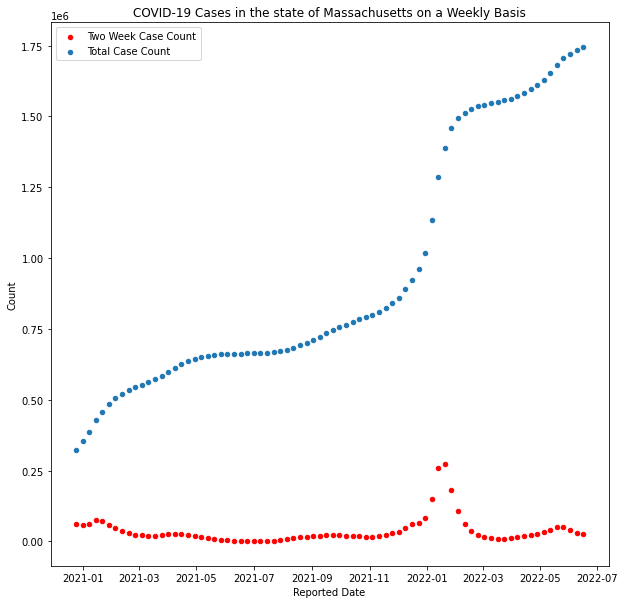

In [10]:
# Visualize COVID case count in MA
ax = weekly_state.plot(x='Report Date',y="Two Week Case Counts",kind='scatter',color='red')

weekly_state.plot(x='Report Date',y="Total Case Counts", kind='scatter',
                          figsize=(10,10),xlabel='Reported Date',
                          title='COVID-19 Cases in the state of Massachusetts on a Weekly Basis',ax=ax,
                 ylabel='Count')
ax.legend(["Two Week Case Count", "Total Case Count"]);

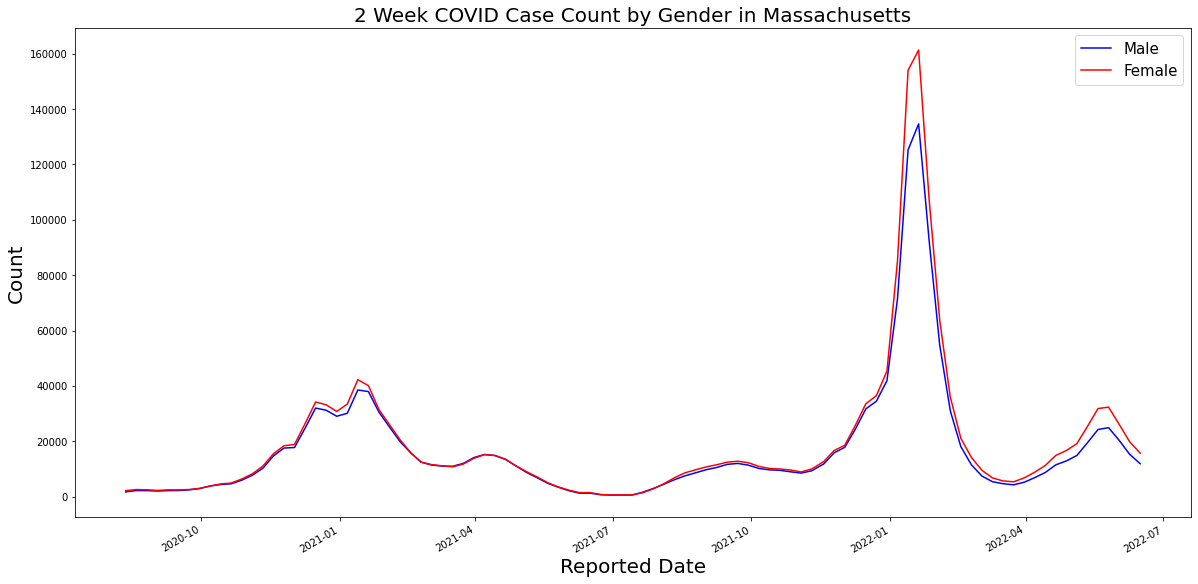

In [11]:
# Visualizing the difference in new COVID cases appearing depending on gender in the state of Massachusetts

ax3 = male.iloc[:97,:].plot(x='Date',y='Cases_Last2Weeks',kind='line',color='blue')

#transgender.iloc[:77,:].plot(x='Date',y='Cases_Last2Weeks',kind='line',color='green')

female.iloc[:97,:].plot(x='Date',y='Cases_Last2Weeks',kind='line',color='red',figsize=(20,10),
                      ax=ax3,title='2 Week COVID Case Count by Gender in Massachusetts')
ax3.legend(['Male','Female'],fontsize=15)
ax3.title.set_size(20)

pyplot.xlabel('Reported Date',fontsize=20)
pyplot.ylabel('Count',fontsize=20)
pyplot.show()

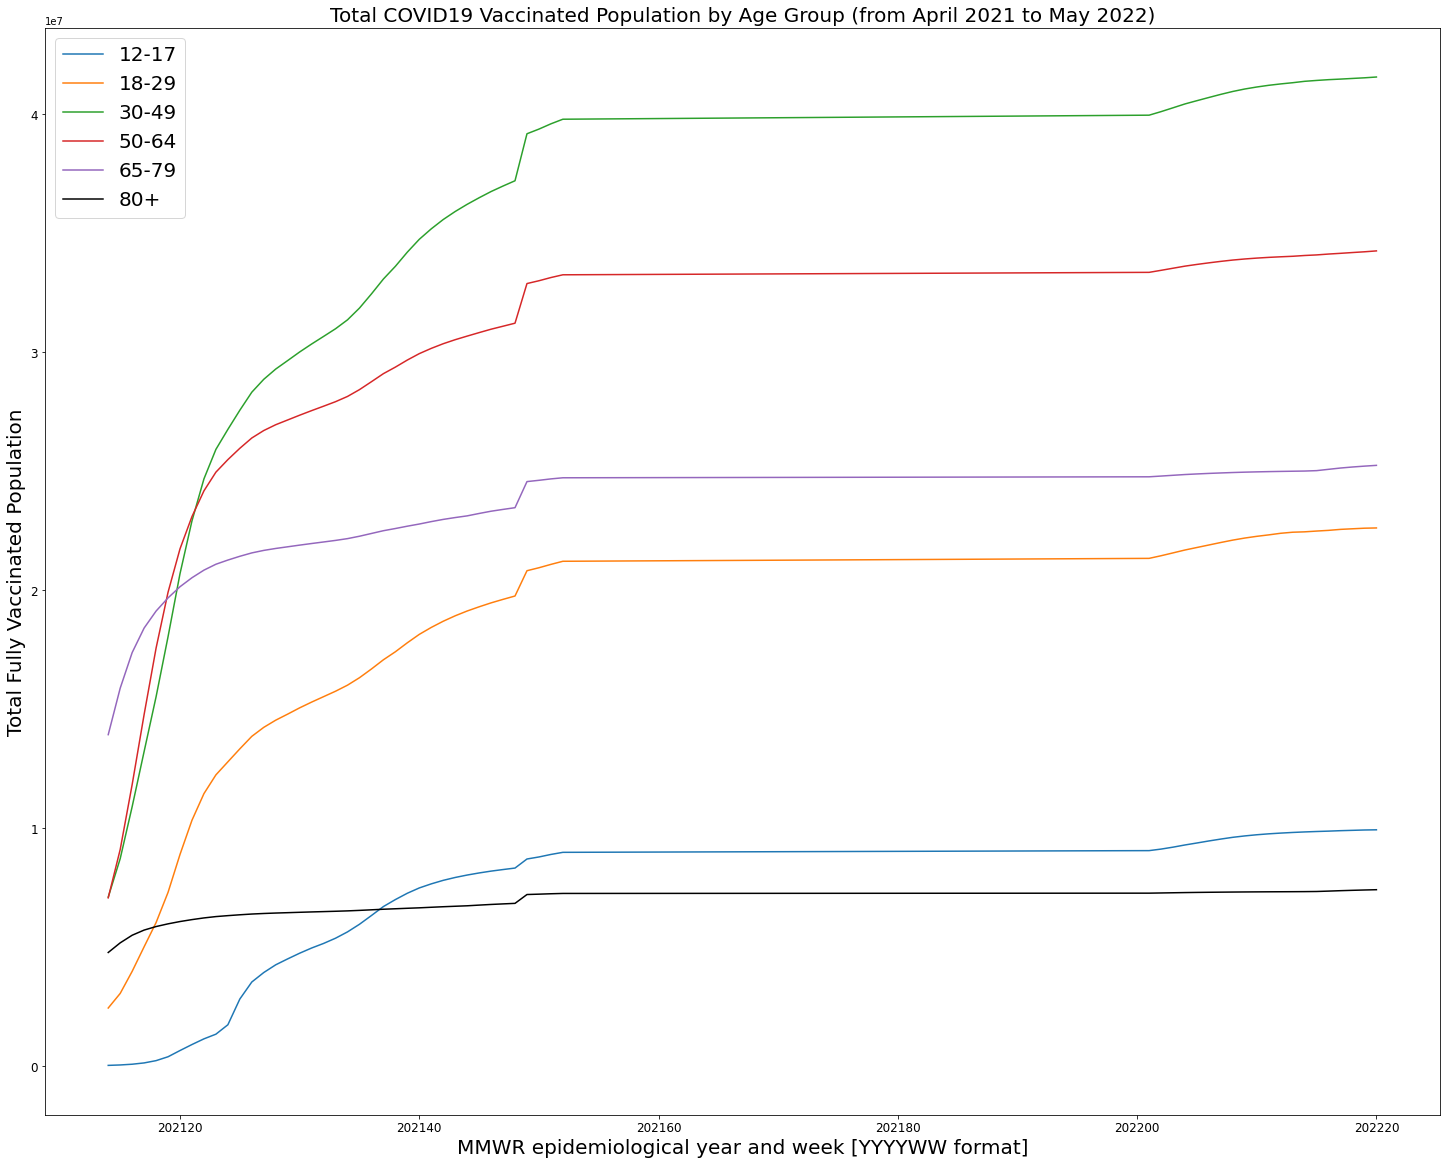

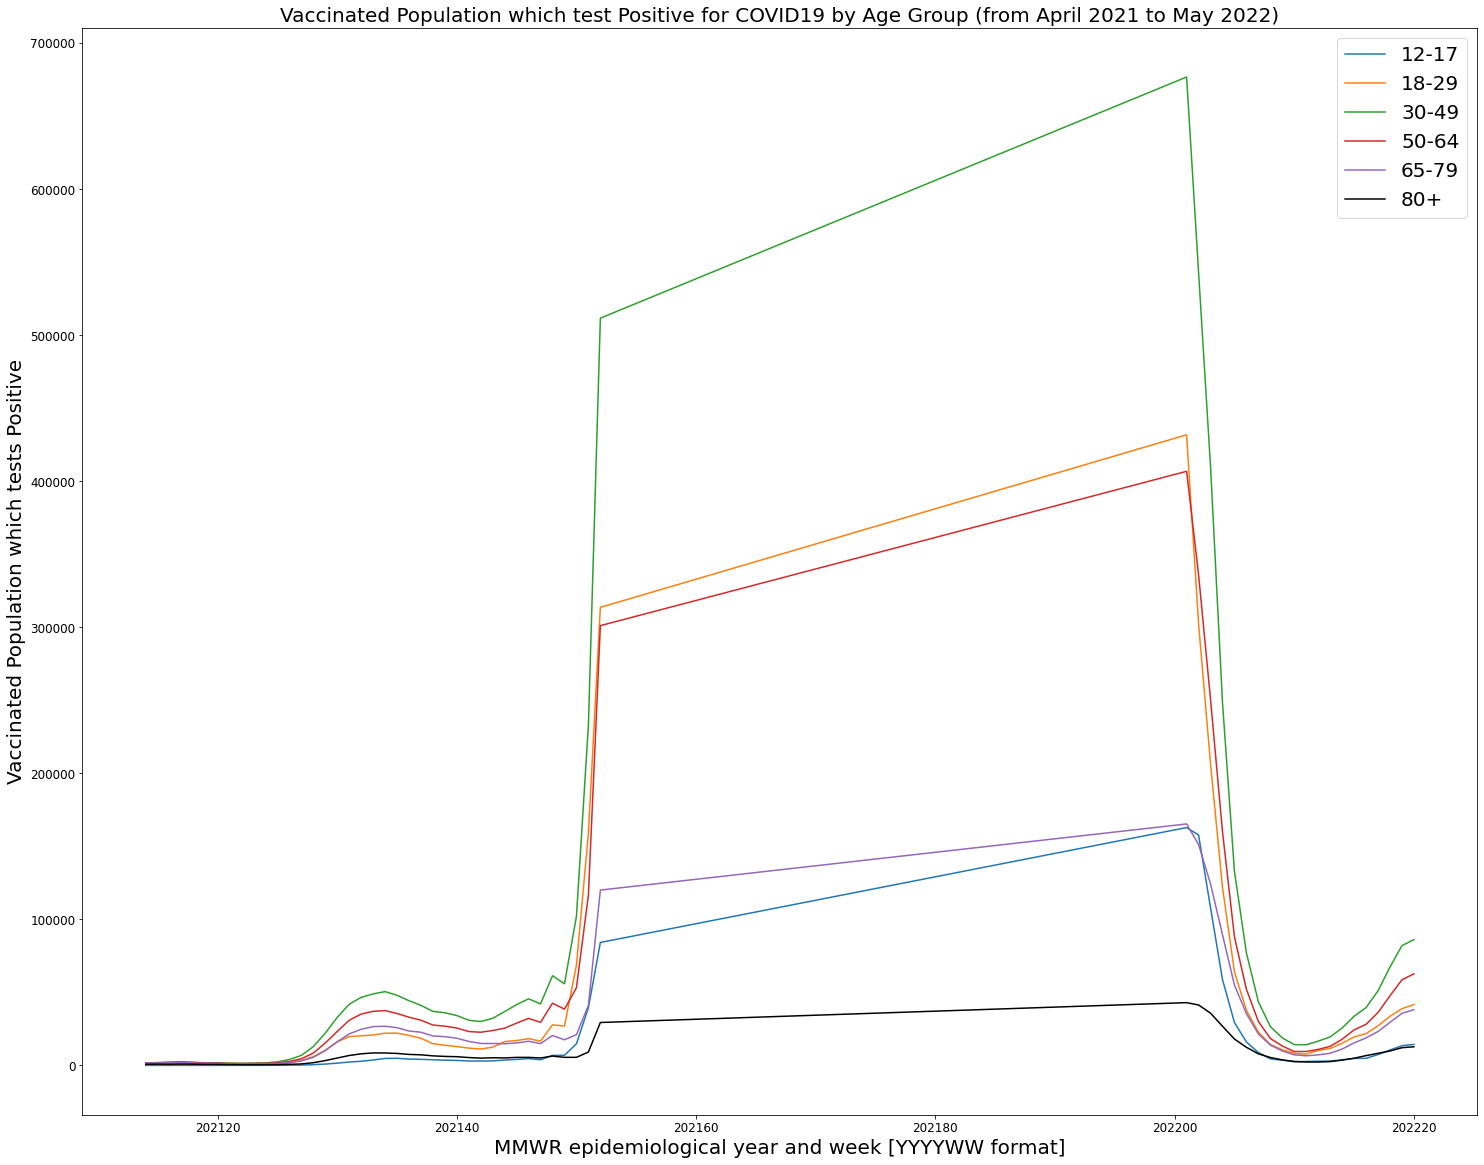

In [12]:
# Splitting COVID19 cases by age group 
twelve_17 = age_vaccine_groups.loc[age_vaccine_groups["Age group"].isin([" 12-17"])]
eighteen_29 = age_vaccine_groups.loc[age_vaccine_groups["Age group"].isin(["18-29"])]
thirty_49 = age_vaccine_groups.loc[age_vaccine_groups["Age group"].isin(["30-49"])]
fifty_64 = age_vaccine_groups.loc[age_vaccine_groups["Age group"].isin(["50-64"])]
sixtyfive_79 = age_vaccine_groups.loc[age_vaccine_groups["Age group"].isin(["65-79"])]
eighty = age_vaccine_groups.loc[age_vaccine_groups["Age group"].isin(["80+"])]

# Total number of vaccinated people over time (April 2021 to May 2022) for each age group
ax = twelve_17.iloc[:59,:].plot(x="MMWR week",y='Fully vaccinated population',kind="line")
eighteen_29.iloc[:59,:].plot(x="MMWR week",y='Fully vaccinated population',kind="line",ax=ax)
thirty_49.iloc[:59,:].plot(x="MMWR week",y='Fully vaccinated population',kind="line",ax=ax)
fifty_64.iloc[:59,:].plot(x="MMWR week",y='Fully vaccinated population',kind="line",ax=ax)
sixtyfive_79.iloc[:59,:].plot(x="MMWR week",y='Fully vaccinated population',kind="line",ax=ax)
eighty.iloc[:59,:].plot(x="MMWR week",y='Fully vaccinated population',kind="line",
                        ax=ax,color='black',figsize=(25,20),
                        title='Total COVID19 Vaccinated Population by Age Group (from April 2021 to May 2022)'
                        ,fontsize=12)


ax.title.set_size(20)
ax.legend(['12-17','18-29','30-49','50-64','65-79','80+'],fontsize=20)
pyplot.xlabel('MMWR epidemiological year and week [YYYYWW format]',fontsize=20)
pyplot.ylabel('Total Fully Vaccinated Population',fontsize=20)
pyplot.savefig('COVID19_TotalPop_Vaccinated.jpg')

# Vaccinated Population which tests positive for COVID19 by the total vaccinated population
# by age group
ax2 = twelve_17.iloc[:59,:].plot(x="MMWR week",y='Vaccinated with outcome',kind="line")
eighteen_29.iloc[:59,:].plot(x="MMWR week",y='Vaccinated with outcome',kind="line",ax=ax2)
thirty_49.iloc[:59,:].plot(x="MMWR week",y='Vaccinated with outcome',kind="line",ax=ax2)
fifty_64.iloc[:59,:].plot(x="MMWR week",y='Vaccinated with outcome',kind="line",ax=ax2)
sixtyfive_79.iloc[:59,:].plot(x="MMWR week",y='Vaccinated with outcome',kind="line",ax=ax2)
eighty.iloc[:59,:].plot(x="MMWR week",y='Vaccinated with outcome',kind="line",
                        ax=ax2,color='black',figsize=(25,20),
                        title='Vaccinated Population which test Positive for COVID19 by Age Group (from April 2021 to May 2022)'
                        ,fontsize=12)


ax2.title.set_size(20)
ax2.legend(['12-17','18-29','30-49','50-64','65-79','80+'],fontsize=20)
pyplot.xlabel('MMWR epidemiological year and week [YYYYWW format]',fontsize=20)
pyplot.ylabel('Vaccinated Population which tests Positive',fontsize=20)
pyplot.savefig('COVID19_TotalPop_Vaccinated_Positive.jpg')

In [13]:
# Comparison of vaccinated people with different products who contract COVID19

